# Sampling and Simulation

Simulation of a Markov chain. In the first part, we will consider a pure Python based implementation where a single particle jumps from one position to another of the lattice, where all transitions to neighboring states have the same probability. Then, we will add probabilities for the transitions. Finally, the implementation will be parallelized to run many chains in parallel.

In [1]:
import numpy
%matplotlib inline

## Random moves in a lattice

We will simulate the propagation of particles in a graph composed of 8 states (denoted by letters A-H) and stored in the variable `S` defined in the cell below. The lattice is the following:

![](lattice.png)

The particle starts in state `A` and then jumps randomly from its current state to one of its neighbors, all with same probability. It cannot stay at the current position. The dictionary `T` defined in the cell below encode such transition behavior.

In [2]:
# List of states
S = list('ABCDEFGH')

# Dictionary of transitions
T = {'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}
print("States: {}".format(S))
print("Transitions: {}".format(T))

States: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Transitions: {'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}


Simulate the experiment of 1999 iterations starting in state `A`. Return the sequence of states visited by the particle as a list. Set the random seed of the module `random` to value `123` using the function `random.seed` before starting the simulation in order to produce deterministic results.

In [3]:
def simulate(transitions):
    state = "A"
    state_sequence = ["A"]
    for i in range (1,2000):
        pick = random.randint(0,len(transitions[state])-1)
        state_sequence += transitions[state][pick]
        state = transitions[state][pick]
    return state_sequence

import random 
random.seed = 123 

In [4]:
# Tests
X = simulate(T)

# Print the first 10 states
print(X[:10])
assert type(X) == list
assert type(X[0]) == str


['A', 'E', 'F', 'G', 'H', 'G', 'F', 'E', 'F', 'G']


Implement a function that returns a list of the relative frequencies of each state.

In [5]:
# Histogram of states in a given sequence
def compute_histogram(state_sequence):
    histogram = []
    length = len(state_sequence)+1
    for state in S:
        histogram += [state_sequence.count(state)/length]
    histogram = (histogram/numpy.sum(histogram)).tolist() #normalize, so it sums up to 1
    return histogram


In [6]:
h = compute_histogram(X)
assert type(h) == list

# Check if the histogram is a valid probability distribution
import numpy
assert numpy.sum(h) == 1.0


Using the above `compute_histogram` function, produce a bar plot sing `matplotlib` (`matplotlib.pyplot.bar`) showing the fraction of the time the particle is found in a given state, averaged over the whole simulation. 

In [7]:
import matplotlib.pyplot as plt
import numpy

In [8]:
def plot_histogram(histogram):
    plt.bar(S, histogram, width=0.8)
    return

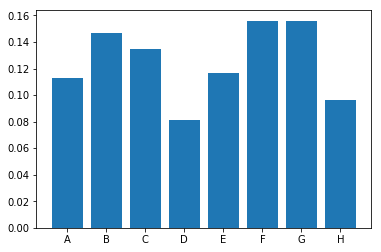

In [9]:
# Plot the histogram of the above defined sequence X
h = compute_histogram(X)
plot_histogram(h)

## Adding a special state

Everytime the particle is in state `F`, it always moves to `E` in the next step. Modify the code to handle this special case, and create a bar plot for the new states distribution. Make sure to not modify the original transition dictionary. To achieve this, we use the `copy` module.

In [10]:
import copy
def modify_transitions(transitions):
    new_transitions = copy.deepcopy(transitions)
    del new_transitions["F"]
    new_transitions["F"] = "E"
    return new_transitions

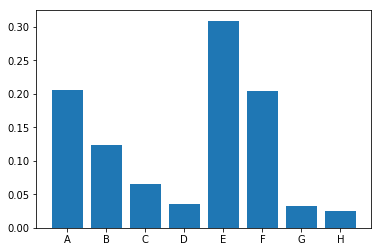

In [11]:
new_T = modify_transitions(T)
new_X = simulate(new_T)
h = compute_histogram(new_X)
plot_histogram(h)

In [12]:
# Tests
new_T = modify_transitions(T)
print(T)
print(new_T)
assert type(new_T) == dict
assert new_T['F'] == 'E'

{'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}
{'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'G': 'FCH', 'H': 'GD', 'F': 'E'}


For simple Markov chains, a number of statistics can be obtained analytically from the structure of the transition model, in particular, by analysis of the transition matrix. The goal here is to compute the transition matrices associated to the previous models. Give the transition matrices as argument to the function `utils.getstationary(P)` and return their result. This last function computes in closed form the stationary distribution associated to a given transition matrix `P` (i.e. the one we would get if running the simulation with such transition matrix for infinitely many time steps and looking at state frequencies).

In [13]:
def to_matrix(transition):
    k = len(transition.keys()) #number of keys = 8
    matrix = numpy.zeros((k,k)) #create transition matrix with zero entries, k x k
    for key in transition: 
        L = 1/len(transition[key])
        row = ord(key)-65
        for j in range(len(transition[key])):
            column = ord(transition[key][j])-65
            matrix[row][column] = L
    return matrix

In [14]:
def get_stationary(matrix):

    import utils
    stationary_distribution = utils.getstationary(matrix)

    return stationary_distribution

In [15]:
# Tests
matrix_T = to_matrix(T)
import numpy
print(numpy.round(matrix_T, 2))
assert type(matrix_T) == numpy.ndarray
assert numpy.sum(matrix_T, axis=1).all() == 1.0
print(numpy.round(get_stationary(matrix_T), 3))

[[0.   0.5  0.   0.   0.5  0.   0.   0.  ]
 [0.33 0.   0.33 0.   0.   0.33 0.   0.  ]
 [0.   0.33 0.   0.33 0.   0.   0.33 0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5 ]
 [0.5  0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.   0.33 0.   0.33 0.  ]
 [0.   0.   0.33 0.   0.   0.33 0.   0.33]
 [0.   0.   0.   0.5  0.   0.   0.5  0.  ]]
[0.1  0.15 0.15 0.1  0.1  0.15 0.15 0.1 ]


C:\Users\ilyab\Desktop\DSProjects\tub-machine-learning\HW4\utils.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return numpy.linalg.lstsq(A,b)[0]


## Non-uniform transition probabilities

We consider the original lattice defined by the variable `T`. We set transition probabilities for each state to be such that: The probability of moving vertically is the same as the probability of moving horizontally for states that have only two connections. For states with 3 connections the probability of moving vertically is 0.5 while the probability of moving left is always twice the probability of moving right.
The goil is to build the transition matrix `P` implementing the described behavior and compute its stationary distribution using the function `utils.getstationary(P)`.

In [16]:
def build_transition_matrix():
    k = len(T.keys()) #number of keys = 8
    transition_matrix = numpy.zeros((k,k)) #create transition matrix with zero entries, k x k
    for key in T: #2 loops ok? sum to 1?
        L = 1 / len(T[key])
        row = ord(key) - 65
        if len(T[key]) < 3:
            for j in range(len(T[key])):
                column = ord(T[key][j])-65
                transition_matrix[row][column] = L
        else:
            transition_matrix[row][ord(T[key][0])-65] = 0.5 / 3
            transition_matrix[row][ord(T[key][1])-65] = 0.5
            transition_matrix[row][ord(T[key][2])-65] = 1 / 3
    return transition_matrix

In [17]:
import utils
stationary = utils.getstationary(build_transition_matrix())

In [18]:
# Tests
P = build_transition_matrix()
print(numpy.round(P, 2))
assert type(P) == numpy.ndarray
assert (numpy.sum(matrix_T, axis=1) == 1.0).all()

[[0.   0.5  0.   0.   0.5  0.   0.   0.  ]
 [0.17 0.   0.33 0.   0.   0.5  0.   0.  ]
 [0.   0.17 0.   0.33 0.   0.   0.5  0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5 ]
 [0.5  0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.17 0.   0.33 0.  ]
 [0.   0.   0.5  0.   0.   0.17 0.   0.33]
 [0.   0.   0.   0.5  0.   0.   0.5  0.  ]]


## Simulation for multiple particles

We let 1000 particles evolve simultaneously in the system described in previous. The initial state of these particles is pseudo-random and given by the function `utils.getinitialstate()`. Using the function `utils.mcstep()` simulate this system for 500 time steps.

In [19]:
def simulate_1000():
    X = utils.getinitialstate()
    pad_shape = ((0, 0), (1, 0)) # ((before_1, after_1), (before_2, after_2))
    padded = numpy.pad(P, pad_shape, mode='constant') # padded transition matrix
    for i in range(500):
        utils.mcstep(X, padded, i)
    estimated_stationary_distribution = numpy.sum(X, axis = 0) / X.shape[0]
    return estimated_stationary_distribution

In [20]:
# Tests
stationary_distribution = simulate_1000()
print(stationary_distribution)
import numpy
assert numpy.sum(stationary_distribution) == 1

[0.115 0.129 0.132 0.114 0.122 0.11  0.138 0.14 ]
